In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/rice/Train'
valid_path = '/content/drive/MyDrive/rice/Test'

In [3]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/rice/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/rice/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 411 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/rice/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 419 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 127s 10s/step - loss: 0.5888 - accuracy: 0.8710 - val_loss: 0.4572 - val_accuracy: 0.9021
Epoch 2/20
13/13 [==============================] - 126s 10s/step - loss: 0.4245 - accuracy: 0.8808 - val_loss: 0.3893 - val_accuracy: 0.8759
Epoch 3/20
13/13 [==============================] - 124s 10s/step - loss: 0.9487 - accuracy: 0.8273 - val_loss: 0.2316 - val_accuracy: 0.9332
Epoch 4/20
13/13 [==============================] - 125s 10s/step - loss: 0.5828 - accuracy: 0.8783 - val_loss: 0.0930 - val_accuracy: 0.9690
Epoch 5/20
13/13 [==============================] - 126s 10s/step - loss: 0.3453 - accuracy: 0.9027 - val_loss: 0.1992 - val_accuracy: 0.9379
Epoch 6/20
13/13 [==============================] - 125s 10s/step - loss: 0.5109 - accuracy: 0.9075 - val_loss: 0.1307 - val_accuracy: 0.9427
Epoch 7/20
13/13 [==============================] - 123s 10s/step - loss: 0.7982 - accuracy: 0.8321 - val_loss: 0.6245 - val_accuracy: 0.8759
Epoch 

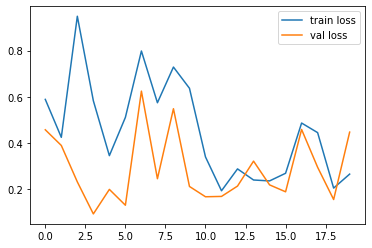

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


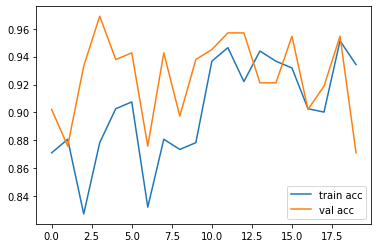

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
model.save('riceinception.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

nmodel=load_model('riceinception.h5')

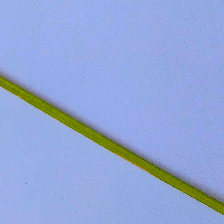

In [19]:
img=image.load_img('/content/drive/MyDrive/rice/Test/Healthy/IMG_20190419_094306.jpg',target_size=(224,224))
img

In [20]:
x=image.img_to_array(img)
x


array([[[154., 176., 233.],
        [152., 177., 233.],
        [155., 180., 236.],
        ...,
        [146., 171., 227.],
        [144., 169., 225.],
        [144., 169., 226.]],

       [[152., 177., 233.],
        [155., 180., 236.],
        [156., 178., 235.],
        ...,
        [138., 163., 220.],
        [144., 169., 225.],
        [140., 165., 221.]],

       [[152., 177., 233.],
        [150., 175., 231.],
        [156., 178., 235.],
        ...,
        [141., 166., 222.],
        [143., 168., 224.],
        [139., 164., 221.]],

       ...,

       [[154., 173., 231.],
        [153., 176., 228.],
        [155., 178., 230.],
        ...,
        [141., 164., 216.],
        [144., 167., 219.],
        [147., 164., 218.]],

       [[158., 174., 233.],
        [152., 175., 227.],
        [153., 176., 228.],
        ...,
        [146., 169., 221.],
        [145., 168., 220.],
        [151., 168., 222.]],

       [[153., 172., 230.],
        [152., 177., 233.],
        [152., 1

In [21]:
x=x/255
x                          

array([[[0.6039216 , 0.6901961 , 0.9137255 ],
        [0.59607846, 0.69411767, 0.9137255 ],
        [0.60784316, 0.7058824 , 0.9254902 ],
        ...,
        [0.57254905, 0.67058825, 0.8901961 ],
        [0.5647059 , 0.6627451 , 0.88235295],
        [0.5647059 , 0.6627451 , 0.8862745 ]],

       [[0.59607846, 0.69411767, 0.9137255 ],
        [0.60784316, 0.7058824 , 0.9254902 ],
        [0.6117647 , 0.69803923, 0.92156863],
        ...,
        [0.5411765 , 0.6392157 , 0.8627451 ],
        [0.5647059 , 0.6627451 , 0.88235295],
        [0.54901963, 0.64705884, 0.8666667 ]],

       [[0.59607846, 0.69411767, 0.9137255 ],
        [0.5882353 , 0.6862745 , 0.90588236],
        [0.6117647 , 0.69803923, 0.92156863],
        ...,
        [0.5529412 , 0.6509804 , 0.87058824],
        [0.56078434, 0.65882355, 0.8784314 ],
        [0.54509807, 0.6431373 , 0.8666667 ]],

       ...,

       [[0.6039216 , 0.6784314 , 0.90588236],
        [0.6       , 0.6901961 , 0.89411765],
        [0.60784316, 0

In [22]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [23]:
nmodel.predict(img_data)

array([[0.9998059 , 0.7939439 , 0.01775211, 0.24778187]], dtype=float32)

In [24]:
a=np.argmax(nmodel.predict(img_data), axis=1)

In [25]:
a==0

array([ True])